In [1]:
import pandas as pd
import os
import numpy as np

THRESHOLD = 2
ROWS = 0
COLUMNS = 1

# depending on the OS the path to the data file is different
if os.name == 'nt':
    data = pd.read_csv(r'..\data\data-with-selected-features.csv')
elif os.name == 'posix':
    data = pd.read_csv(r'../data/data-with-selected-features.csv')

data.head()

# # depending on the OS the path to the data file is different
# if os.name == 'nt':
#     data = pd.read_excel(r'..\data\nutrient-file-release2-jan22.xlsx', sheet_name='All solids & liquids per 100g')
# elif os.name == 'posix':
#     data = pd.read_excel(r'../data/nutrient-file-release2-jan22.xlsx', sheet_name='All solids & liquids per 100g')

# # replace 0 with NaN
# data = data.replace({0: np.nan})
    
# # get the list of row/column names before dropping
# before_cols = data.columns
# before_rows = data.index

# # remove rows/columns with less than (THRESHOLD) non-null values
# data = data.dropna(thresh=THRESHOLD, axis=COLUMNS)
# data = data.dropna(thresh=THRESHOLD, axis=ROWS)

# # get the list of row/column names after dropping
# after_cols = data.columns
# after_rows = data.index

# # find the removed rows/columns
# removed_rows = [row for row in before_rows if row not in after_rows]
# removed_cols = [col for col in before_cols if col not in after_cols]

# # print the removed rows/columns
# print("Removed" , len(removed_rows), "rows")
# print("Removed" , len(removed_cols), "columns")
# print("Removed rows: ", removed_rows)
# print("Removed columns: ", removed_cols)

,Public Food Key,Classification,Food Name,"Energy with dietary fibre, equated \n(kJ)","Energy, without dietary fibre, equated \n(kJ)",Moisture (water) \n(g),Protein \n(g),Nitrogen \n(g),"Fat, total \n(g)",Ash \n(g),...,Dietary folate equivalents \n(ug),Vitamin D3 equivalents \n(ug),C18 (g),"Total saturated fatty acids, equated \n(g)","Total monounsaturated fatty acids, equated \n(g)",C18:2w6 (g),"Total trans fatty acids, imputed \n(mg)",Cholesterol \n(mg),Tryptophan \n(mg/gN),Tryptophan \n(mg)
0,F002258,31302.0,"Cardamom seed, dried, ground",1236,1012,8.3,10.8,1.72,6.7,5.8,...,3,0.0,NaN,2.20,2.81,1.00,0.0,0,90.0,155
1,F002893,31302.0,"Chilli (chili), dried, ground",1280,1002,10.8,13.4,2.14,14.3,11.8,...,28,0.0,NaN,2.06,2.68,6.24,0.0,0,32.0,69
2,F002963,31302.0,"Cinnamon, dried, ground",1004,579,10.6,4.0,0.64,1.2,3.6,...,6,0.0,NaN,0.62,0.44,0.08,0.0,0,77.0,49
3,F002970,31302.0,"Cloves, dried, ground",1389,1118,9.9,6.0,0.96,13.0,5.6,...,25,0.0,NaN,5.49,1.93,3.69,0.0,0,31.0,30
4,F003190,31302.0,"Coriander seed, dried, ground",1344,1009,8.9,12.4,1.98,17.8,6.0,...,0,0.0,NaN,1.03,14.14,1.82,0.0,0,90.0,178


In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# split data into train and test sets
train, test = train_test_split(data, test_size=0.2)

In [3]:
# use nutrition columns as features
X_COLS = list(data.columns[3:])

# use classification column as target
y_COL = data.columns[1]

print(f"X_COLS: {X_COLS}")
print(f"y_COL: {y_COL}")

X_COLS: ['Energy with dietary fibre, equated \n(kJ)', 'Energy, without dietary fibre, equated \n(kJ)', 'Moisture (water) \n(g)', 'Protein \n(g)', 'Nitrogen \n(g)', 'Fat, total \n(g)', 'Ash \n(g)', 'Total sugars (g)', 'Starch \n(g)', 'Available carbohydrate, without sugar alcohols \n(g)', 'Available carbohydrate, with sugar alcohols \n(g)', 'Calcium (Ca) \n(mg)', 'Iodine (I) \n(ug)', 'Iron (Fe) \n(mg)', 'Magnesium (Mg) \n(mg)', 'Phosphorus (P) \n(mg)', 'Potassium (K) \n(mg)', 'Selenium (Se) \n(ug)', 'Sodium (Na) \n(mg)', 'Zinc (Zn) \n(mg)', 'Thiamin (B1) \n(mg)', 'Riboflavin (B2) \n(mg)', 'Niacin (B3) \n(mg)', 'Niacin derived from tryptophan \n(mg)', 'Niacin derived equivalents \n(mg)', 'Pyridoxine (B6) \n(mg)', 'Cobalamin (B12) \n(ug)', 'Folate, natural \n(ug)', 'Total folates \n(ug)', 'Dietary folate equivalents \n(ug)', 'Vitamin D3 equivalents \n(ug)', 'C18 (g)', 'Total saturated fatty acids, equated \n(g)', 'Total monounsaturated fatty acids, equated \n(g)', 'C18:2w6 (g)', 'Total tr

In [4]:
# create design matrix X and predictions y
X_train = train[X_COLS]
y_train = train[y_COL]
X_test = test[X_COLS]
y_test = test[y_COL]

# sample some rows of training set and their labels
print(f"X_train: {X_train.head()}")
print("Labels:", y_train.iloc[:5].reset_index(drop=True).values)

# sample some rows of test set and their labels
print(f"X_test: {X_test.head()}")
print("Labels:", y_test.iloc[:5].reset_index(drop=True).values)

X_train:      Energy with dietary fibre, equated \n(kJ)   
131                                       1701  \
144                                        961   
704                                        457   
663                                        321   
485                                        255   

     Energy, without dietary fibre, equated \n(kJ)  Moisture (water) \n(g)   
131                                           1659                     4.2  \
144                                            936                    38.8   
704                                            457                    74.5   
663                                            321                    78.7   
485                                            255                    87.3   

     Protein \n(g)  Nitrogen \n(g)  Fat, total \n(g)  Ash \n(g)   
131            7.5            1.20              15.6        1.4  \
144            8.8            1.50               1.4        1.6   
704           21.6  

## $k$-NN

In [5]:
from sklearn.neighbors import KNeighborsClassifier

# create knn with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# replace NaN values with 0
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)
y_train = y_train.fillna(0)
y_test = y_test.fillna(0)

# train the model using the training set
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [6]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# predict the labels of the test set
y_pred = knn.predict(X_test)

# print the predictions
print(f"First 5 predictions: {y_pred[:5]}")

First 5 predictions: [13401. 24601. 11603. 16401. 18102.]


In [7]:
# check the accuracy
from sklearn.metrics import accuracy_score

# y_test constains the true labels of the test set
# y_pred contains the predicted labels of the test set
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# compare manually predicted labels with the true labels
print(f"Predictions: {y_pred[:10]}")
print(f"True labels: {y_test[:10].values}")



Accuracy: 0.45987654320987653
Predictions: [13401. 24601. 11603. 16401. 18102. 28101. 14303. 19201. 24501. 24101.]
True labels: [13401. 24601. 12402. 16105. 18102. 27204. 14304. 19106. 19209. 24101.]


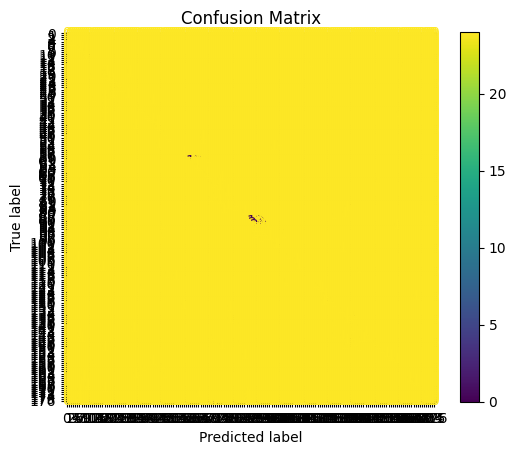

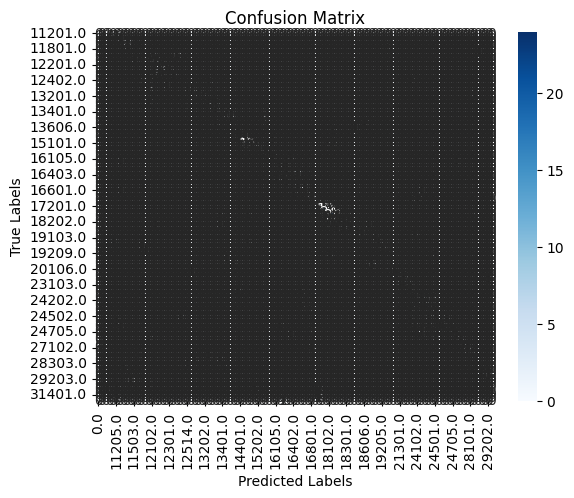

In [8]:
# show confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# create a confusion matrix using crosstab
cm2 = pd.crosstab(y_test, y_pred)
#print(cm2)

# create confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)

# plot confusion matrix
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# plot the confusion matrix using seaborn
sns.heatmap(cm2, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# both these plots are cursed mfs